In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import math

In [2]:
_header = ["rate", "spreading", "bandwidth", "config", "bps", "max_payload"]
_configs = [
    ["DR0", 12, 125, "SF12/125kHz",   250,  51],
    ["DR1", 11, 125, "SF11/125kHz",   440,  51],
    ["DR2", 10, 125, "SF10/125kHz",   980,  51],
    ["DR3",  9, 125,  "SF9/125kHz",  1760, 115],
    ["DR4",  8, 125,  "SF8/125kHz",  3125, 222],
    ["DR5",  7, 125,  "SF7/125kHz",  5470, 222],
    ["DR6",  7, 250,  "SF7/250kHz", 11000, 222],
]
configs = pandas.DataFrame(_configs, columns = _header)
configs

,rate,spreading,bandwidth,config,bps,max_payload
0,DR0,12,125,SF12/125kHz,250,51
1,DR1,11,125,SF11/125kHz,440,51
2,DR2,10,125,SF10/125kHz,980,51
3,DR3,9,125,SF9/125kHz,1760,115
4,DR4,8,125,SF8/125kHz,3125,222
5,DR5,7,125,SF7/125kHz,5470,222
6,DR6,7,250,SF7/250kHz,11000,222


In [3]:
configs["t_sym"] = (2 ** configs["spreading"]) / (configs["bandwidth"])
configs["t_preamble"] = (8 + 4.25) * configs["t_sym"]

In [4]:
def t_packet(payload_size, spreading_factor, bandwidth, coding_rate=4/5, explicit_header=1, low_dr_optimize=0):
    """Semtech LoRa Modem Design Guide, page 7"""
    t_sym = (2 ** spreading_factor) / (bandwidth * 1000)
    t_preamble = (8 + 4.25) * t_sym
    payloadSymbNb = 8 + max( math.ceil( (8.0*payload_size - 4.0*spreading_factor + 28 + 16 - 20*explicit_header) / (4.0*(spreading_factor - 2.0*low_dr_optimize)) ) * (coding_rate + 4), 0)
    t_payload = t_sym * payloadSymbNb
    
    return (t_preamble + t_payload)

payload_size = 12

Spreading 12, max 1.9218431999999999
Spreading 11, max 1.0395648
Spreading 10, max 0.559104
Spreading 9, max 0.574464
Spreading 8, max 0.582144
Spreading 7, max 0.33039359999999995
Spreading 7, max 0.16519679999999998


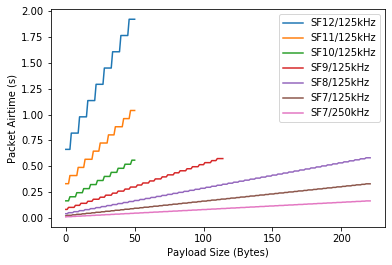

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i, row in configs.iterrows():
    packet_bytes = list(range(row["max_payload"]))
    packet_time = [t_packet(b, row["spreading"], row["bandwidth"]) for b in packet_bytes]
    ax.plot(packet_bytes, packet_time, label=row["config"])
    print(f"Spreading {row['spreading']}, max {packet_time[-1]}")
    #_t_packet = t_packet(payload_size, row["spreading"], row["bandwidth"])
    #print(f"{payload_size} bytes via {row['config']}: {_t_packet}")

ax.set_xlabel("Payload Size (Bytes)")
ax.set_ylabel("Packet Airtime (s)")
legend = plt.legend()
fig.savefig("../gfx/lora-airtime.pdf")